In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('c:\\Users\\samue\\Downloads\\amazon_sales_dataset.csv')

In [4]:
df.count()

order_id            50000
order_date          50000
product_id          50000
product_category    50000
price               50000
discount_percent    50000
quantity_sold       50000
customer_region     50000
payment_method      50000
rating              50000
review_count        50000
discounted_price    50000
total_revenue       50000
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          50000 non-null  int64  
 1   order_date        50000 non-null  object 
 2   product_id        50000 non-null  int64  
 3   product_category  50000 non-null  object 
 4   price             50000 non-null  float64
 5   discount_percent  50000 non-null  int64  
 6   quantity_sold     50000 non-null  int64  
 7   customer_region   50000 non-null  object 
 8   payment_method    50000 non-null  object 
 9   rating            50000 non-null  float64
 10  review_count      50000 non-null  int64  
 11  discounted_price  50000 non-null  float64
 12  total_revenue     50000 non-null  float64
dtypes: float64(4), int64(5), object(4)
memory usage: 5.0+ MB


# 
- change order_date to DATE datatype



In [6]:
df.describe()

,order_id,product_id,price,discount_percent,quantity_sold,rating,review_count,discounted_price,total_revenue
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,25000.500000,2986.848740,252.507260,13.340700,2.999400,2.996316,249.329280,218.886566,657.331475
std,14433.901067,1156.374535,143.025544,9.850694,1.415401,1.154295,144.251981,127.317681,526.223968
min,1.000000,1000.000000,5.010000,0.000000,1.000000,1.000000,0.000000,3.530000,3.840000
25%,12500.750000,1983.000000,127.840000,5.000000,2.000000,2.000000,125.000000,109.680000,240.320000
50%,25000.500000,2983.000000,252.970000,10.000000,3.000000,3.000000,250.000000,215.805000,505.410000
75%,37500.250000,3989.000000,376.335000,20.000000,4.000000,4.000000,374.000000,322.702500,968.970000
max,50000.000000,4999.000000,499.990000,30.000000,5.000000,5.000000,499.000000,499.910000,2499.550000


In [7]:
df.head()

,order_id,order_date,product_id,product_category,price,discount_percent,quantity_sold,customer_region,payment_method,rating,review_count,discounted_price,total_revenue
0,1,2022-04-13,2637,Books,128.75,10,4,North America,UPI,3.5,443,115.88,463.52
1,2,2023-03-12,2300,Fashion,302.60,20,5,Asia,Credit Card,3.7,475,242.08,1210.40
2,3,2022-09-28,3670,Sports,495.80,20,2,Europe,UPI,4.4,183,396.64,793.28
3,4,2022-04-17,2522,Books,371.95,15,4,Middle East,UPI,5.0,212,316.16,1264.64
4,5,2022-03-13,1717,Beauty,201.68,0,4,Middle East,UPI,4.6,308,201.68,806.72


#### Date Type Transformation

In [8]:
df['order_date'] = pd.to_datetime(df['order_date'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          50000 non-null  int64         
 1   order_date        50000 non-null  datetime64[ns]
 2   product_id        50000 non-null  int64         
 3   product_category  50000 non-null  object        
 4   price             50000 non-null  float64       
 5   discount_percent  50000 non-null  int64         
 6   quantity_sold     50000 non-null  int64         
 7   customer_region   50000 non-null  object        
 8   payment_method    50000 non-null  object        
 9   rating            50000 non-null  float64       
 10  review_count      50000 non-null  int64         
 11  discounted_price  50000 non-null  float64       
 12  total_revenue     50000 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(5), object(3)
memory usage: 5.0+ MB


In [10]:
df["order_date"].min(), df["order_date"].max()

(Timestamp('2022-01-01 00:00:00'), Timestamp('2023-12-31 00:00:00'))

### Step - 3

In [11]:
df["quantity_sold"].describe()

count    50000.000000
mean         2.999400
std          1.415401
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: quantity_sold, dtype: float64

In [12]:
df[df["quantity_sold"] <= 0].shape

(0, 13)

### Step - 4

In [13]:
df["year_week"] = df["order_date"].dt.to_period("W").astype(str)

In [14]:
df[["order_date", "year_week"]].head()

,order_date,year_week
0,2022-04-13,2022-04-11/2022-04-17
1,2023-03-12,2023-03-06/2023-03-12
2,2022-09-28,2022-09-26/2022-10-02
3,2022-04-17,2022-04-11/2022-04-17
4,2022-03-13,2022-03-07/2022-03-13


In [15]:
df["year_week"].nunique()

105

### Step 5 — Aggregate to Weekly SKU Demand

In [16]:
weekly_df = (
    df
    .groupby(["year_week", "product_id"], as_index=False)
    .agg({
        "quantity_sold": "sum",
        "price": "mean",
        "discount_percent": "mean",
        'total_revenue': 'sum'
    })
)

In [17]:
weekly_df.rename(columns={
    "quantity_sold": "weekly_quantity_sold", 
    "price": "weekly_avg_price", 
    "discount_percent": "weekly_avg_discount_percent",
}, inplace=True)

In [18]:
weekly_df

,year_week,product_id,weekly_quantity_sold,weekly_avg_price,weekly_avg_discount_percent,total_revenue
0,2021-12-27/2022-01-02,1042,4,316.16,0.0,1264.64
1,2021-12-27/2022-01-02,1050,3,51.42,30.0,107.97
2,2021-12-27/2022-01-02,1080,5,436.82,0.0,2184.10
3,2021-12-27/2022-01-02,1094,3,402.62,10.0,1087.08
4,2021-12-27/2022-01-02,1140,3,375.66,5.0,1070.64
...,...,...,...,...,...,...
47146,2023-12-25/2023-12-31,4960,1,350.03,0.0,350.03
47147,2023-12-25/2023-12-31,4964,1,439.64,15.0,373.69
47148,2023-12-25/2023-12-31,4977,2,222.28,20.0,355.64
47149,2023-12-25/2023-12-31,4984,1,131.93,10.0,118.74


In [19]:
weekly_df.shape

(47151, 6)

In [20]:
weekly_df.head()

,year_week,product_id,weekly_quantity_sold,weekly_avg_price,weekly_avg_discount_percent,total_revenue
0,2021-12-27/2022-01-02,1042,4,316.16,0.0,1264.64
1,2021-12-27/2022-01-02,1050,3,51.42,30.0,107.97
2,2021-12-27/2022-01-02,1080,5,436.82,0.0,2184.10
3,2021-12-27/2022-01-02,1094,3,402.62,10.0,1087.08
4,2021-12-27/2022-01-02,1140,3,375.66,5.0,1070.64


### Step 6 — Identify Top SKUs by Total Demand

In [21]:
top_skus = (
    weekly_df
    .groupby("product_id")["weekly_quantity_sold"]
    .sum()
    .sort_values(ascending=False)
    .head(15)
)

In [22]:
top_skus

product_id
1087    81
1580    80
3537    79
4217    79
1617    78
2048    78
1386    77
2785    77
4204    77
3700    75
4796    73
4264    72
3809    72
1266    72
4933    71
Name: weekly_quantity_sold, dtype: int64

filtering the dataset

In [23]:
weekly_top_df = (
    weekly_df[weekly_df['product_id'].isin(top_skus.index)]
).copy()

In [24]:
weekly_top_df['product_id'].nunique()

15

In [25]:
weekly_top_df.shape

(308, 6)

- If you have 105 weeks and 15 SKUs, ideal full matrix would be: 105 × 15 = 1575 rows.
- we only have 308.

That means:
- Many SKU–week combinations are missing.

Which means:
- Those SKUs did not sell in many weeks.

This is important.
- Right now out dataset only contains weeks where at least one transaction occurred.
- But forecasting requires continuous weekly time series.
- We must create missing weeks with zero demand.

### Step 7 — Create Complete Weekly Grid

In [26]:
# Extract unique weeks:
all_weeks = weekly_df["year_week"].unique()

In [27]:
# Extract top SKU list:
sku_list = top_skus.index

In [28]:
sku_list

Index([1087, 1580, 3537, 4217, 1617, 2048, 1386, 2785, 4204, 3700, 4796, 4264,
       3809, 1266, 4933],
      dtype='int64', name='product_id')

In [29]:
# Create full grid:
full_index = pd.MultiIndex.from_product(
    [all_weeks, sku_list],
    names=["year_week", "product_id"]
)

full_df = pd.DataFrame(index=full_index).reset_index()

In [30]:
full_df

,year_week,product_id
0,2021-12-27/2022-01-02,1087
1,2021-12-27/2022-01-02,1580
2,2021-12-27/2022-01-02,3537
3,2021-12-27/2022-01-02,4217
4,2021-12-27/2022-01-02,1617
...,...,...
1570,2023-12-25/2023-12-31,4796
1571,2023-12-25/2023-12-31,4264
1572,2023-12-25/2023-12-31,3809
1573,2023-12-25/2023-12-31,1266


In [31]:
# Merge with your filtered data
weekly_top_df = full_df.merge(
    weekly_top_df,
    on=["year_week", "product_id"],
    how="left"
)

In [32]:
# Fill missing demand with 0

weekly_top_df["weekly_quantity_sold"] = weekly_top_df["weekly_quantity_sold"].fillna(0)

In [33]:
weekly_top_df.shape

(1575, 6)

In [34]:
weekly_top_df["product_id"].nunique()

15

In [35]:
weekly_top_df["year_week"].nunique()

105

### Step - 8 Convert year_week to Week Start Date

In [36]:
weekly_top_df["week_start"] = (
    pd.to_datetime(
        weekly_top_df["year_week"].str.split("/").str[0]
    )
)

In [37]:
# drop the old column
weekly_top_df.drop(columns=["year_week"], inplace=True)

In [38]:
# sort properly
weekly_top_df = weekly_top_df.sort_values(
    ["product_id", "week_start"]
).reset_index(drop=True)

In [39]:
weekly_top_df

,product_id,weekly_quantity_sold,weekly_avg_price,weekly_avg_discount_percent,total_revenue,week_start
0,1087,0.0,NaN,NaN,NaN,2021-12-27
1,1087,0.0,NaN,NaN,NaN,2022-01-03
2,1087,4.0,390.19,20.0,1248.60,2022-01-10
3,1087,0.0,NaN,NaN,NaN,2022-01-17
4,1087,0.0,NaN,NaN,NaN,2022-01-24
...,...,...,...,...,...,...
1570,4933,0.0,NaN,NaN,NaN,2023-11-27
1571,4933,0.0,NaN,NaN,NaN,2023-12-04
1572,4933,0.0,NaN,NaN,NaN,2023-12-11
1573,4933,5.0,102.90,10.0,463.05,2023-12-18


In [40]:
weekly_top_df.dtypes

product_id                              int64
weekly_quantity_sold                  float64
weekly_avg_price                      float64
weekly_avg_discount_percent           float64
total_revenue                         float64
week_start                     datetime64[ns]
dtype: object

### Step 9 — Forward Fill Price and Discount Per SKU

In [41]:
weekly_top_df[["weekly_avg_price", 
               "weekly_avg_discount_percent"]] = (
    weekly_top_df
    .groupby("product_id")[["weekly_avg_price",
                            "weekly_avg_discount_percent"]]
    .ffill()
)

In [42]:
# Then fill any remaining initial NaNs with 0
weekly_top_df[["weekly_avg_price",
               "weekly_avg_discount_percent"]] = (
    weekly_top_df[["weekly_avg_price",
                   "weekly_avg_discount_percent"]]
    .fillna(0)
)

In [43]:
# Revenue for zero-demand weeks should be 0
weekly_top_df["total_revenue"] = weekly_top_df["total_revenue"].fillna(0)

In [44]:
weekly_top_df.isna().sum()

product_id                     0
weekly_quantity_sold           0
weekly_avg_price               0
weekly_avg_discount_percent    0
total_revenue                  0
week_start                     0
dtype: int64

### Step 10 — Validate Time Continuity Per SKU

In [45]:
weekly_top_df.groupby("product_id").size()

product_id
1087    105
1266    105
1386    105
1580    105
1617    105
2048    105
2785    105
3537    105
3700    105
3809    105
4204    105
4217    105
4264    105
4796    105
4933    105
dtype: int64

### Step 11 — Pick ONE SKU and Analyze It Deeply

In [46]:
top_skus.head(1)

product_id
1087    81
Name: weekly_quantity_sold, dtype: int64

In [47]:
sku_id = 1087

sku_df = weekly_top_df[
    weekly_top_df["product_id"] == sku_id
].copy()


In [48]:
sku_df["weekly_quantity_sold"].describe()

count    105.000000
mean       0.771429
std        1.739016
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       10.000000
Name: weekly_quantity_sold, dtype: float64

In [49]:
mean_demand = sku_df["weekly_quantity_sold"].mean()
std_demand = sku_df["weekly_quantity_sold"].std()
cv = std_demand / mean_demand

In [50]:
mean_demand

np.float64(0.7714285714285715)

In [51]:
std_demand

np.float64(1.7390157630613425)

In [52]:
cv

np.float64(2.254279692857296)

In [53]:
(sku_df["weekly_quantity_sold"] == 0).sum()

np.int64(83)

### Step 12 — Plot Weekly Demand for SKU 1087

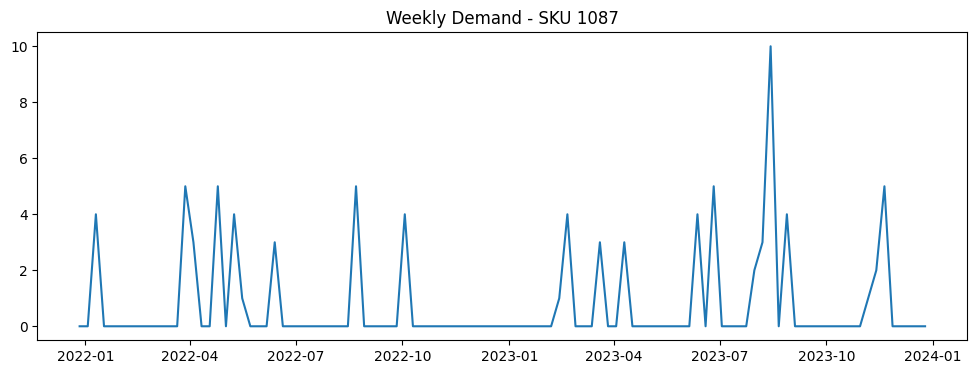

In [54]:
plt.figure(figsize=(12,4))
plt.plot(sku_df["week_start"], sku_df["weekly_quantity_sold"])
plt.title(f"Weekly Demand - SKU {sku_id}")
plt.show()

### Step 13 — Compute CV for All 15 SKUs

In [55]:
sku_stats = (
    weekly_top_df
    .groupby("product_id")["weekly_quantity_sold"]
    .agg(["mean", "std"])
)

sku_stats["cv"] = sku_stats["std"] / sku_stats["mean"]

sku_stats.sort_values("cv", ascending=False)

,mean,std,cv
product_id,,,
1266,0.685714,1.788394,2.608074
4796,0.695238,1.710397,2.460160
3809,0.685714,1.665916,2.429460
4933,0.676190,1.602253,2.369530
2785,0.733333,1.733531,2.363905
4264,0.685714,1.589111,2.317454
3537,0.752381,1.741910,2.315196
1087,0.771429,1.739016,2.254280
3700,0.714286,1.609553,2.253374


### Step 14 — Count Non-Zero Weeks Per SKU

In [56]:
non_zero_counts = (
    weekly_top_df
    .groupby("product_id")["weekly_quantity_sold"]
    .apply(lambda x: (x > 0).sum())
)

non_zero_counts.sort_values()

product_id
1266    17
3809    18
4264    18
2785    19
3700    19
4933    20
3537    20
1617    21
4796    21
4217    21
1386    22
1580    22
1087    22
2048    23
4204    25
Name: weekly_quantity_sold, dtype: int64

### Step 15 — Prepare Data for One SKU (1087) for Forecasting

In [57]:
sku_id = 1087
sku_df = weekly_top_df[
    weekly_top_df["product_id"] == sku_id
].copy()

In [58]:
sku_df = sku_df.sort_values("week_start")

In [59]:
# create lag features
sku_df["lag_1"] = sku_df["weekly_quantity_sold"].shift(1)
sku_df["lag_2"] = sku_df["weekly_quantity_sold"].shift(2)
sku_df["lag_4"] = sku_df["weekly_quantity_sold"].shift(4)

In [60]:
sku_df["rolling_mean_4"] = (
    sku_df["weekly_quantity_sold"]
    .rolling(4)
    .mean()
)

In [62]:
# drop rows with NaN
sku_df = sku_df.dropna().reset_index(drop=True)

In [63]:
sku_df.head()

,product_id,weekly_quantity_sold,weekly_avg_price,weekly_avg_discount_percent,total_revenue,week_start,lag_1,lag_2,lag_4,rolling_mean_4
0,1087,0.0,390.19,20.0,0.0,2022-01-24,0.0,4.0,0.0,1.0
1,1087,0.0,390.19,20.0,0.0,2022-01-31,0.0,0.0,0.0,1.0
2,1087,0.0,390.19,20.0,0.0,2022-02-07,0.0,0.0,4.0,0.0
3,1087,0.0,390.19,20.0,0.0,2022-02-14,0.0,0.0,0.0,0.0
4,1087,0.0,390.19,20.0,0.0,2022-02-21,0.0,0.0,0.0,0.0


In [64]:
sku_df.shape

(101, 10)

### Step 16 — Time-Based Train/Test Split

In [65]:
train_size = int(len(sku_df) * 0.8)

In [66]:
train = sku_df.iloc[:train_size]
test = sku_df.iloc[train_size:]

In [67]:
train.shape

(80, 10)

In [68]:
test.shape

(21, 10)

In [71]:
train["week_start"].min(), train["week_start"].max()

(Timestamp('2022-01-24 00:00:00'), Timestamp('2023-07-31 00:00:00'))

In [72]:
test["week_start"].min(), test["week_start"].max()

(Timestamp('2023-08-07 00:00:00'), Timestamp('2023-12-25 00:00:00'))

### Step 17 — Train Baseline Model (Linear Regression)

In [73]:
from sklearn.linear_model import LinearRegression

features = ["lag_1", "lag_2", "lag_4", "rolling_mean_4"]

X_train = train[features]
y_train = train["weekly_quantity_sold"]

X_test = test[features]
y_test = test["weekly_quantity_sold"]

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

In [74]:
predictions[:5]

array([1.34620234, 4.81518411, 0.66096954, 3.94497284, 4.82391698])

### Step 18 — Evaluate Forecast Performance

In [75]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

mape = np.mean(
    np.abs((y_test - predictions) / y_test)
) * 100

mae, rmse, mape

(1.1351151447549879, np.float64(1.874429345731591), np.float64(inf))

### Step 19 — Compute MAPE Safely (Ignore Zero Actuals)

In [76]:
mask = y_test > 0

mape_safe = np.mean(
    np.abs((y_test[mask] - predictions[mask]) / y_test[mask])
) * 100

mae, rmse, mape_safe

(1.1351151447549879,
 np.float64(1.874429345731591),
 np.float64(45.09732951748393))

### Step 20 — Compare Actual vs Predicted in Test Set

In [77]:
test = test.copy()
test["predicted"] = predictions

test[["week_start", "weekly_quantity_sold", "predicted"]].head(10)

,week_start,weekly_quantity_sold,predicted
80,2023-08-07,3.0,1.346202
81,2023-08-14,10.0,4.815184
82,2023-08-21,0.0,0.660970
83,2023-08-28,4.0,3.944973
84,2023-09-04,0.0,4.823917
85,2023-09-11,0.0,0.631482
86,2023-09-18,0.0,1.918636
87,2023-09-25,0.0,0.157418
88,2023-10-02,0.0,-0.034478
89,2023-10-09,0.0,-0.034478


### Step 21 — Clip Negative Predictions

In [78]:
predictions_clipped = np.maximum(predictions, 0)

In [79]:
mae_clip = mean_absolute_error(y_test, predictions_clipped)
rmse_clip = np.sqrt(mean_squared_error(y_test, predictions_clipped))

mask = y_test > 0
mape_clip = np.mean(
    np.abs((y_test[mask] - predictions_clipped[mask]) / y_test[mask])
) * 100

mae_clip, rmse_clip, mape_clip

(1.1252644176546265,
 np.float64(1.8743387482667961),
 np.float64(45.09732951748393))

### Step 22 — Compare With Naive Forecast

In [80]:
naive_pred = test["lag_1"].values

mae_naive = mean_absolute_error(y_test, naive_pred)
rmse_naive = np.sqrt(mean_squared_error(y_test, naive_pred))

mask = y_test > 0
mape_naive = np.mean(
    np.abs((y_test[mask] - naive_pred[mask]) / y_test[mask])
) * 100

mae_naive, rmse_naive, mape_naive

(1.7142857142857142,
 np.float64(3.2219485379118615),
 np.float64(68.88888888888887))

### Step 23 — Add Business Features

In [81]:
features_hybrid = [
    "lag_1",
    "lag_2",
    "lag_4",
    "rolling_mean_4",
    "weekly_avg_price",
    "weekly_avg_discount_percent"
]

In [82]:
X_train_h = train[features_hybrid]
X_test_h = test[features_hybrid]

y_train = train["weekly_quantity_sold"]
y_test = test["weekly_quantity_sold"]

In [83]:
model_h = LinearRegression()
model_h.fit(X_train_h, y_train)

pred_h = model_h.predict(X_test_h)
pred_h = np.maximum(pred_h, 0)

In [84]:
mae_h = mean_absolute_error(y_test, pred_h)
rmse_h = np.sqrt(mean_squared_error(y_test, pred_h))

mask = y_test > 0
mape_h = np.mean(
    np.abs((y_test[mask] - pred_h[mask]) / y_test[mask])
) * 100

mae_h, rmse_h, mape_h

(1.1114906693660749,
 np.float64(1.8694724027448442),
 np.float64(45.40037099082028))

### Step 24 — Compute Inventory Parameters for SKU 1087

In [85]:
mean_d = sku_df["weekly_quantity_sold"].mean()
std_d = sku_df["weekly_quantity_sold"].std()

In [86]:
lead_time = 2
Z = 1.65

safety_stock = Z * std_d * np.sqrt(lead_time)
reorder_point = (mean_d * lead_time) + safety_stock

mean_d, std_d, safety_stock, reorder_point

(np.float64(0.7623762376237624),
 np.float64(1.738669116603186),
 np.float64(4.057101584546133),
 np.float64(5.581854059793658))

In [87]:
current_inventory = int(np.ceil(reorder_point))
current_inventory

6

In [88]:
risk_flags = []

for pred in pred_h:
    if pred * lead_time > current_inventory:
        risk_flags.append(1)
    else:
        risk_flags.append(0)

sum(risk_flags)

3

In [89]:
test = test.copy()
test["predicted_h"] = pred_h
test["risk_flag"] = risk_flags

risk_df = test[test["risk_flag"] == 1]

revenue_at_risk = (
    risk_df["predicted_h"] *
    risk_df["weekly_avg_price"] *
    lead_time
).sum()

revenue_at_risk

np.float64(7948.408393475991)

If extended to all top SKUs, the same pipeline would compute volatility, forecast accuracy, safety stock, reorder point, and revenue risk. SKUs would then be ranked by revenue contribution and volatility to prioritize inventory control

### Step 27 — Service Level Sensitivity Analysis

In [90]:
mean_d = sku_df["weekly_quantity_sold"].mean()
std_d = sku_df["weekly_quantity_sold"].std()
lead_time = 2

Z_values = {
    "90%": 1.28,
    "95%": 1.65,
    "99%": 2.33
}

results = {}

for level, Z in Z_values.items():
    safety_stock = Z * std_d * np.sqrt(lead_time)
    reorder_point = (mean_d * lead_time) + safety_stock
    results[level] = (safety_stock, reorder_point)

results

{'90%': (np.float64(3.147327289829727), np.float64(4.672079765077251)),
 '95%': (np.float64(4.057101584546133), np.float64(5.581854059793658)),
 '99%': (np.float64(5.729119207268175), np.float64(7.253871682515699))}

For SKU 1087, increasing service level from 95% to 99% increases reorder point from 5.6 units to 7.3 units, representing a ~30% increase in buffer inventory for only 4% improvement in service level.

#### we are done with 
Data → Forecast → Inventory → Risk → Financial Impact